In this blog post, we're going to examine how autostereograms work and how to build our own. Our plan of attack is as follows. First, we will explain how it is possible to give the illusion of depth using a single image and geometrical optics of the eye. This will be illustrated by the wallpaper effect. Then we will generalize this principle to any depth map using the algorithm explained by Thimbleby.

# Eye physics 

When you look at an object, your eyes do two things: they align towards the object and they adjust the focus so to see that object sharply on your retina. Let's try to illustrate this:

In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, fixed

In [106]:
@interact
def plot_eye_movement(x_pos=(-1, 1, 0.1), y_pos=(1, 4, 0.1), newfig=fixed(True), showfig=fixed(True)):
    "Plots the eye movement relative to an object."
    if newfig:
        plt.figure(figsize=(5, 5))
    left_xy = (-1, 0)
    right_xy = (1, 0)
    ax = plt.gca()
    ax.add_artist(plt.Circle(left_xy, 0.1))
    ax.add_artist(plt.Circle(right_xy, 0.1))
    ax.add_artist(plt.Circle((x_pos, y_pos), 0.05))
    ax.set_xlim(-2.2, 2.2)
    ax.set_ylim(-0.2, 4.2)
    ax.plot((left_xy[0], x_pos), (left_xy[1], y_pos), color='orange')
    ax.plot((right_xy[0], x_pos), (right_xy[1], y_pos), color='orange')
    plt.axis('off')
    if showfig: plt.show()
    

Let's make a still drawing of several of these plots.

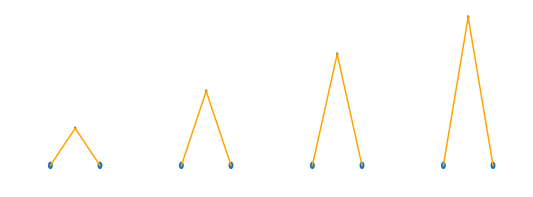

In [107]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 4, 1)
plot_eye_movement(0, 1, False, False)
plt.subplot(1, 4, 2)
plot_eye_movement(0, 2, False, False)
plt.subplot(1, 4, 3)
plot_eye_movement(0, 3, False, False)
plt.subplot(1, 4, 4)
plot_eye_movement(0, 4, False, False)


What one can see in the above figure is that 

# Plan of attack 

- demonstrate the wallpaper effect
- explain the principle behind stereopsis (geometry, convergence and focusing)
- explain the first algorithm (Tyler)
- explain the second algorithm (Thimbleby)
- do some case studies (explore different parameters of the algorithm, maps, charts, different wallpapers)

# Thimbleby 

Let's implement the Thimbleby algorithm.

First, we need a depth map.

In [25]:
max_x = 300

In [26]:
depth_map = (np.cos((np.arange(max_x) - max_x/2) / max_x/2. * 4 * np.pi) + 1)/2

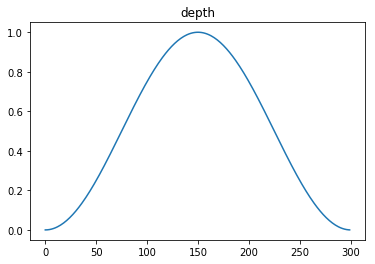

In [27]:
plt.plot(depth_map)
plt.title('depth')

Now we do the first pass: init the constraint vector.

In [28]:
constraint = np.arange(depth_map.size)

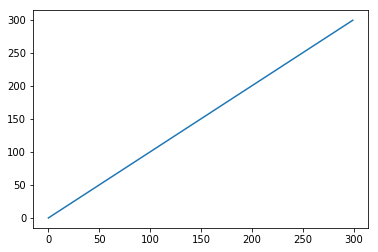

In [29]:
plt.plot(constraint)

Now we do the constraint loop.

In [30]:
def compute_separation(depth, E, mu=1/3):
    "Depth should be in 0-1 range."
    return (1 - mu * depth) / (2 - mu * depth) * E

In [31]:
E = 300

In [32]:
def compute_constraint(depth_map):
    constraint = np.arange(depth_map.size)
    for x in np.arange(depth_map.size):
        s = compute_separation(depth_map[x], E=E)
        left = int(x - s/2)
        right = left + s
        left_valid = left >= 0 and left < depth_map.size
        right_valid = right >= 0 and right < depth_map.size
        if left_valid and right_valid:
            if constraint[left] == left:
                constraint[left] = right
            else:
                k = left
                while not constraint[k] == k:
                    k = constraint[k]
                    if k < right:
                        left = k
                    else:
                        left = right
                        right = k
                constraint[left] = right
    return constraint

In [33]:
constraint = compute_constraint(depth_map)

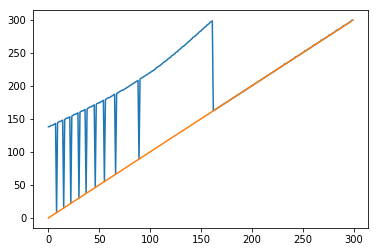

In [34]:
plt.plot(constraint)
plt.plot(np.arange(constraint.size))

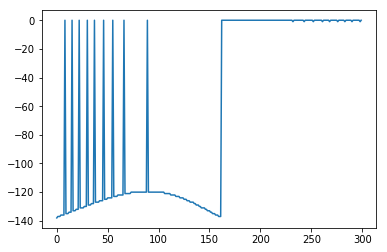

In [35]:
plt.plot(np.arange(constraint.size) - constraint)

In [36]:
np.unique(constraint).size / constraint.size

0.57

We can look at it interactively.

In [38]:
@interact
def plot_constraints(idx=(0, depth_map.size - 1)):
    "Plots the decision process."
    s = compute_separation(depth_map[idx], E=E)
    left = int(idx - s/2)
    right = int(idx + s/2)
    plt.plot(depth_map)
    plt.plot(left, 1, 'o')
    plt.plot(right, 1, 'o')
    plt.title('separation={:.2f}'.format(s))
    plt.show()

The second loop is in decreasing order, from right to left.

In [39]:
def fill_pixels(constraint):
    "Fills pixels from constraint mappping."
    pixels = np.empty_like(constraint)
    for x in np.arange(constraint.size)[::-1]:
        if constraint[x] == x:
            pixels[x] = np.random.randint(2)
        else:
            pixels[x] = pixels[constraint[x]]
    return pixels

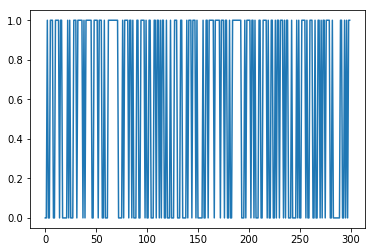

In [40]:
pixels = fill_pixels(constraint)

plt.plot(pixels)

Now all, we need to do is repeat that a hundred lines.

In [41]:
autostereogram = np.r_[[fill_pixels(constraint) for _ in range(max_x)]]

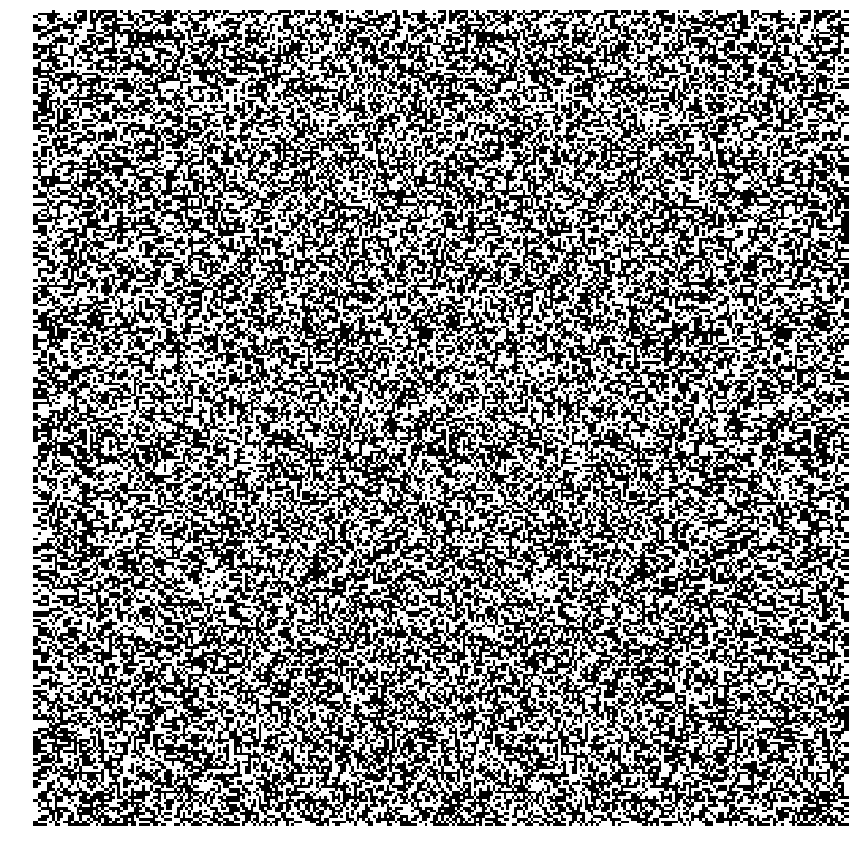

In [42]:
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(autostereogram, cmap='gray')

# Applications

Math functions (complex math maybe)

Wikipedia dolphin or shark

Google maps

